In [80]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [81]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
import seaborn as sns

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [82]:
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import plotly.express as px

In [83]:
train=pd.read_csv('train.csv', index_col=0) #인덱스 col=0도 check!
test=pd.read_csv('test_x.csv', index_col=0)
submission=pd.read_csv('sample_submission.csv', index_col=0) 

In [84]:
train.shape, test.shape

((45532, 77), (11383, 76))

In [85]:
display(train.head())
display(test.head())

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1


### 결측치 처리 함수

In [86]:
train['familysize'] = train['familysize'].replace(2147483647, np.NaN)
train['familysize'] = train['familysize'].replace(999, np.NaN)
train['familysize'] = train['familysize'].replace(100, np.NaN)

In [87]:
def remove_zero(train):
    train['education'] = train['education'].replace(0, np.NaN)
    train['engnat'] = train['engnat'].replace(0, np.NaN)
    train['hand'] = train['hand'].replace(0, np.NaN)
    train['married'] = train['married'].replace(0, np.NaN)
    train['urban'] = train['urban'].replace(0, np.NaN)
    train[['tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10']] = train[['tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10']].replace(7, np.NaN)
    train = train.dropna(axis=0)
    return train


In [88]:
train = remove_zero(train)
#test = remove_zero(test)

### 라벨인코딩

In [89]:
string_columns = list(train.columns[train.dtypes=='object'])
string_columns

['age_group', 'gender', 'race', 'religion']

In [90]:
encoder = LabelEncoder()

def label_encoding(train, test, string_columns):
    for column in string_columns:
        new_feature = 'label_' + column
        train[new_feature] = encoder.fit_transform(train[column])
        test[new_feature] = encoder.fit_transform(test[column])
        print('인코딩 변환값:',train[new_feature])
        print('인코딩 클래스:',encoder.classes_)
    
    train = train.drop(string_columns, axis = 1)
    test = test.drop(string_columns, axis = 1)
    
    return train, test

In [91]:
train, test = label_encoding(train, test, string_columns)

인코딩 변환값: index
1        2
2        3
3        2
4        2
6        2
        ..
45526    1
45527    1
45528    3
45529    1
45531    2
Name: label_age_group, Length: 43532, dtype: int32
인코딩 클래스: ['+70s' '10s' '20s' '30s' '40s' '50s' '60s']
인코딩 변환값: index
1        0
2        1
3        0
4        1
6        1
        ..
45526    0
45527    0
45528    1
45529    0
45531    1
Name: label_gender, Length: 43532, dtype: int32
인코딩 클래스: ['Female' 'Male']
인코딩 변환값: index
1        1
2        6
3        1
4        6
6        6
        ..
45526    6
45527    6
45528    6
45529    6
45531    6
Name: label_race, Length: 43532, dtype: int32
인코딩 클래스: ['Arab' 'Asian' 'Black' 'Indigenous Australian' 'Native American' 'Other'
 'White']
인코딩 변환값: index
1         7
2        10
3         7
4         0
6         1
         ..
45526     5
45527     8
45528     1
45529     5
45531     0
Name: label_religion, Length: 43532, dtype: int32
인코딩 클래스: ['Agnostic' 'Atheist' 'Buddhist' 'Christian_Catholic' 'Christian_Mo

In [92]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,label_age_group,label_gender,label_race,label_religion
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,4.0,2.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0,4.0,0.0,4.0,3.0,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2,0,1,7
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,3.0,1.0,3.0,1.0,2.0,2.0,3.0,1.0,5.0,3.0,4.0,2.0,6.0,1.0,3.0,2.0,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,3,1,6,10
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,4.0,2.0,0.0,1.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,2,0,1,7
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,6.0,0.0,2.0,0.0,6.0,2.0,6.0,1.0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,2,1,6,0
6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,616,2.0,549,5.0,390,4.0,1601,5.0,1312,1.0,1699,4.0,1229,4.0,1175,1.0,1078,4.0,341,5.0,635,2.0,1448,4.0,838,4.0,765,3.0,1954,1.0,1482,2.0,1.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,1.0,1.0,3.0,2.0,1.0,5.0,2.0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,2,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45526,4.0,454,5.0,1007,4.0,758,2.0,1117,3.0,946,1.0,364,2.0,641,1.0,1261,2.0,1352,2.0,1253,5.0,1032,5.0,828,4.0,688,2.0,460,1.0,492,2.0,720,4.0,599,1.0,1080,1.0,830,1.0,671,2.0,1.0,3.0,1.0,1.0,5.0,1.0,5.0,0.0,2.0,3.0,2.0,1.0,6.0,5.0,3.0,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,6,5
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,2.0,1.0,1.0,3.0,1.0,1.0,2.0,6.0,1.0,2.0,6.0,3.0,0.0,6.0,4.0,3.0,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,6,8
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0,4.0,1.0,5.0,1.0,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,3,1,6,1


In [93]:
print(encoder.classes_)

['Agnostic' 'Atheist' 'Buddhist' 'Christian_Catholic' 'Christian_Mormon'
 'Christian_Other' 'Christian_Protestant' 'Hindu' 'Jewish' 'Muslim'
 'Other' 'Sikh']


#### 학력과 투표율

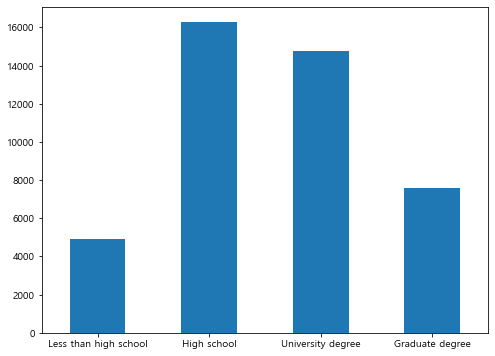

In [94]:
x_labels = ['Less than high school', 'High school', 'University degree', 'Graduate degree']
ax = train['education'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

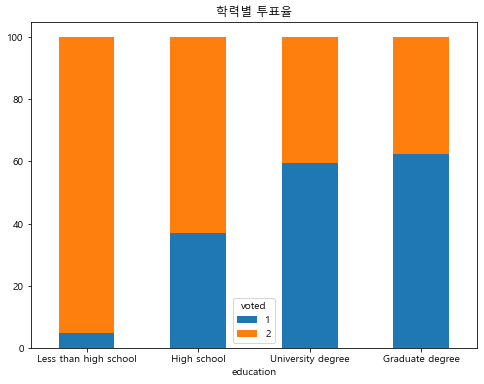

In [95]:
ax = train.groupby('education')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('학력별 투표율')
plt.show()

#### 모국어영어와 투표율

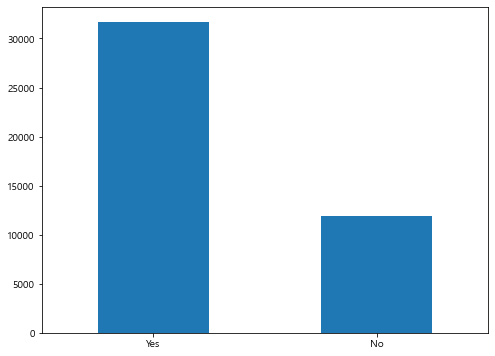

In [96]:
x_labels = ['Yes', 'No']
ax = train['engnat'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

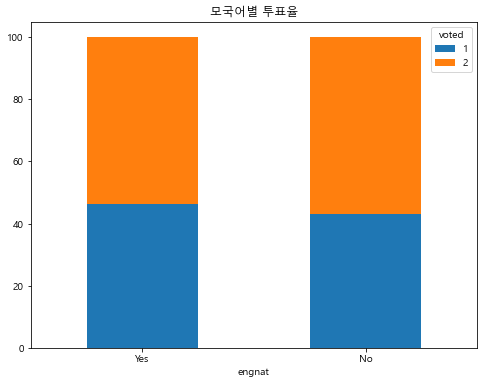

In [97]:
ax = train.groupby('engnat')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('모국어별 투표율')
plt.show()

#### 가족수와 투표율

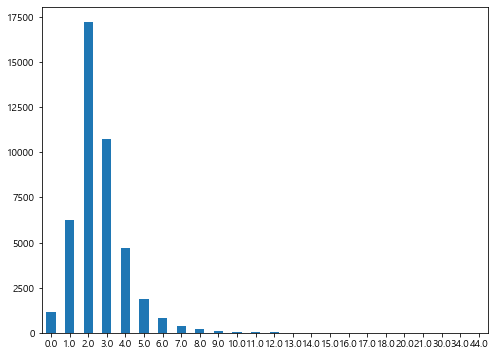

In [98]:
#x_labels = ['Yes', 'No']
ax = train['familysize'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
#ax.set_xticklabels(x_labels)
plt.show()

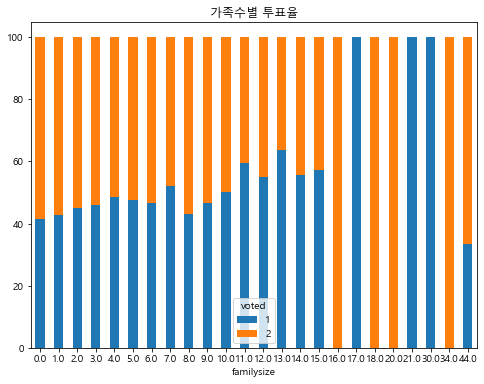

In [99]:
ax = train.groupby('familysize')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
#ax.set_xticklabels(x_labels)
ax.set_title('가족수별 투표율')
plt.show()

#### 손잡이와 투표율

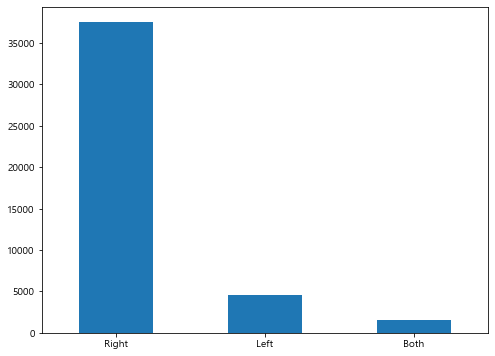

In [100]:
x_labels = ['Right', 'Left', 'Both']
ax = train['hand'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

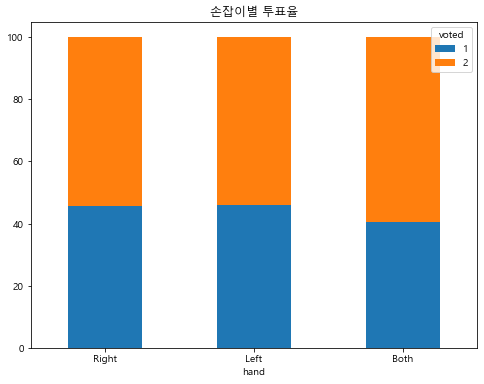

In [101]:
ax = train.groupby('hand')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('손잡이별 투표율')
plt.show()

#### 결혼과 투표율

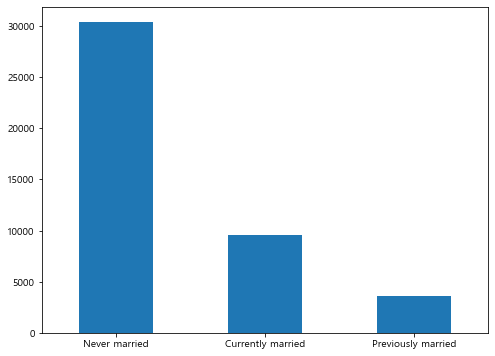

In [102]:
x_labels = ['Never married', 'Currently married', 'Previously married']
ax = train['married'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

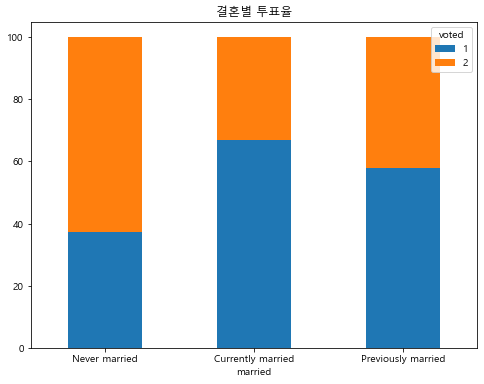

In [103]:
ax = train.groupby('married')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('결혼별 투표율')
plt.show()

#### 유년기거주구역과 투표율

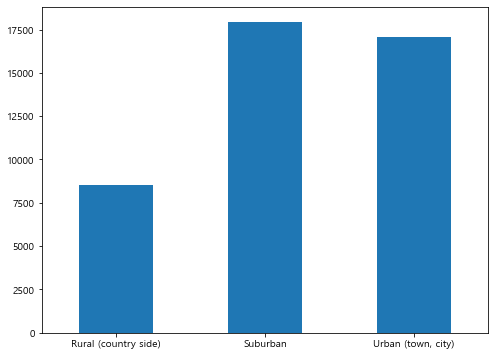

In [104]:
x_labels = ['Rural (country side)', 'Suburban', 'Urban (town, city)']
ax = train['urban'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

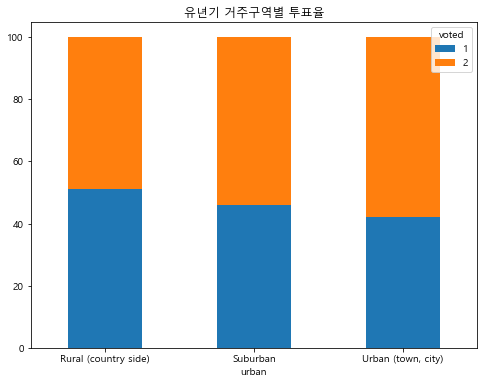

In [105]:
ax = train.groupby('urban')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('유년기 거주구역별 투표율')
plt.show()

#### 나이와 투표율

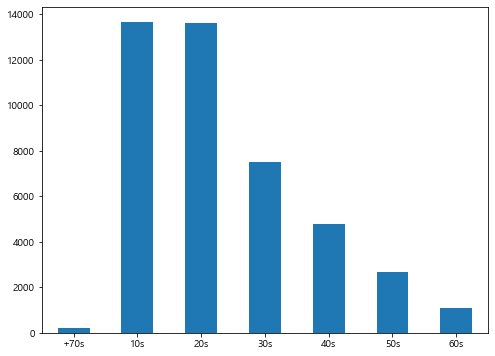

In [106]:
x_labels = ['+70s','10s','20s','30s','40s','50s','60s']
ax = train['label_age_group'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

In [107]:
train.groupby('label_age_group')['voted'].value_counts()

label_age_group  voted
0                1          151
                 2           49
1                2        11395
                 1         2251
2                1         7251
                 2         6360
3                1         4434
                 2         3087
4                1         3082
                 2         1701
5                1         1821
                 2          871
6                1          791
                 2          288
Name: voted, dtype: int64

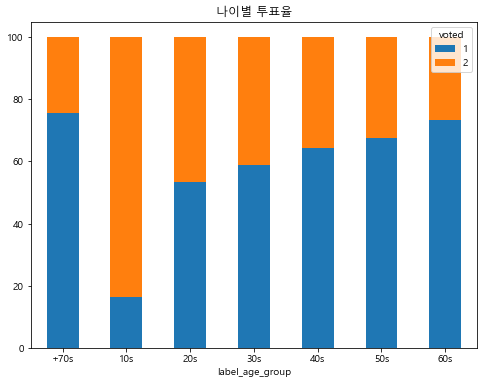

In [108]:
ax = train.groupby('label_age_group')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('나이별 투표율')
plt.show()

#### 성별과 투표율

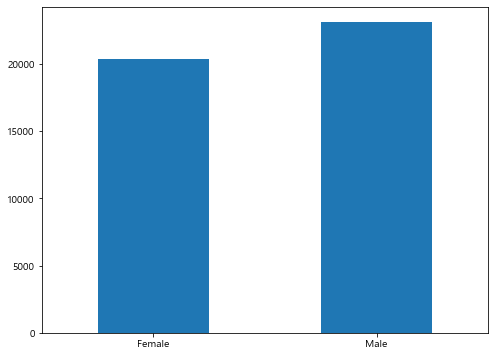

In [109]:
x_labels = ['Female', 'Male']
ax = train['label_gender'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

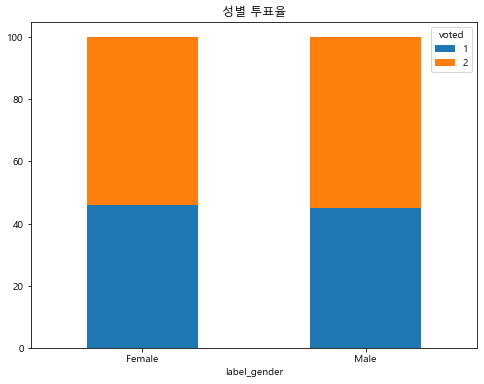

In [110]:
ax = train.groupby('label_gender')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('성별 투표율')
plt.show()

#### 인종과 투표율

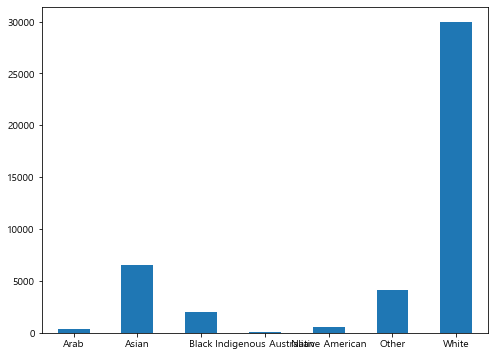

In [111]:
x_labels = ['Arab','Asian','Black','Indigenous Australian','Native American','Other','White']
ax = train['label_race'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

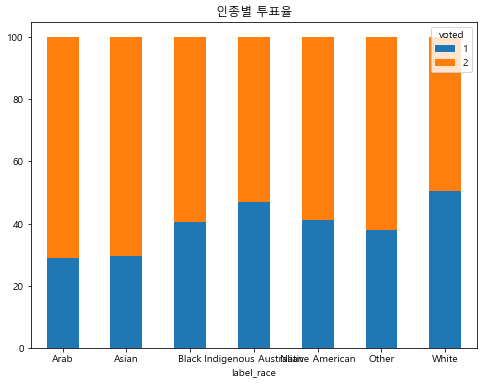

In [112]:
ax = train.groupby('label_race')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('인종별 투표율')
plt.show()

#### 종교와 투표율

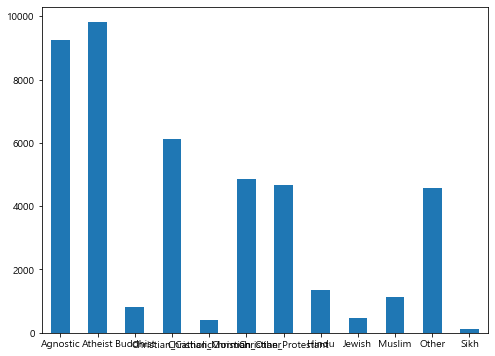

In [113]:
x_labels = ['Agnostic','Atheist','Buddhist','Christian_Catholic','Christian_Mormon',
 'Christian_Other','Christian_Protestant','Hindu','Jewish','Muslim',
 'Other','Sikh']
ax = train['label_religion'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

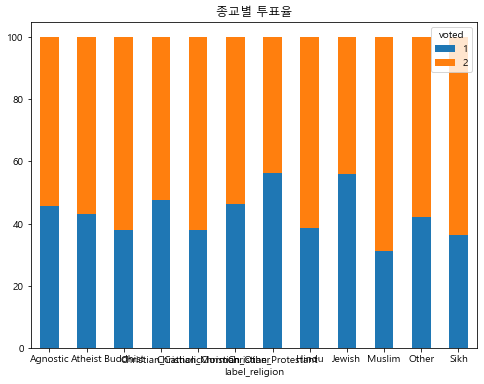

In [114]:
ax = train.groupby('label_religion')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('종교별 투표율')
plt.show()

### 긍정적 문제 답변 점수 반전

In [115]:
def reverse_score(score):
    return 6 - score

In [116]:
train[['QaA','QdA','QeA','QgA','QiA','QkA','QnA','QqA','QrA']] = train[['QaA','QdA','QeA','QgA','QiA','QkA','QnA','QqA','QrA']].apply(reverse_score)
test[['QaA','QdA','QeA','QgA','QiA','QkA','QnA','QqA','QrA']] = test[['QaA','QdA','QeA','QgA','QiA','QkA','QnA','QqA','QrA']].apply(reverse_score)

In [117]:
def make_mkscore(train):
    Q_A_df = train.filter(regex='Q*A')
    train['mkscore'] = Q_A_df.sum(axis=1)
    return train

In [118]:
train = make_mkscore(train)
test = make_mkscore(test)

<AxesSubplot:>

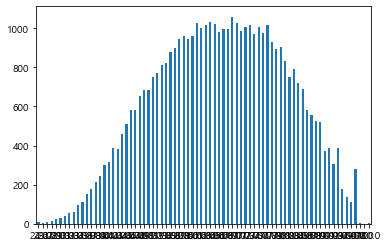

In [119]:
train['mkscore'].value_counts().sort_index().plot(kind = 'bar', rot = 0)

In [120]:
fig = px.bar(train, x=train['mkscore'].value_counts().index, y=train['mkscore'].value_counts(), title = 'mkscore') 
fig.show()

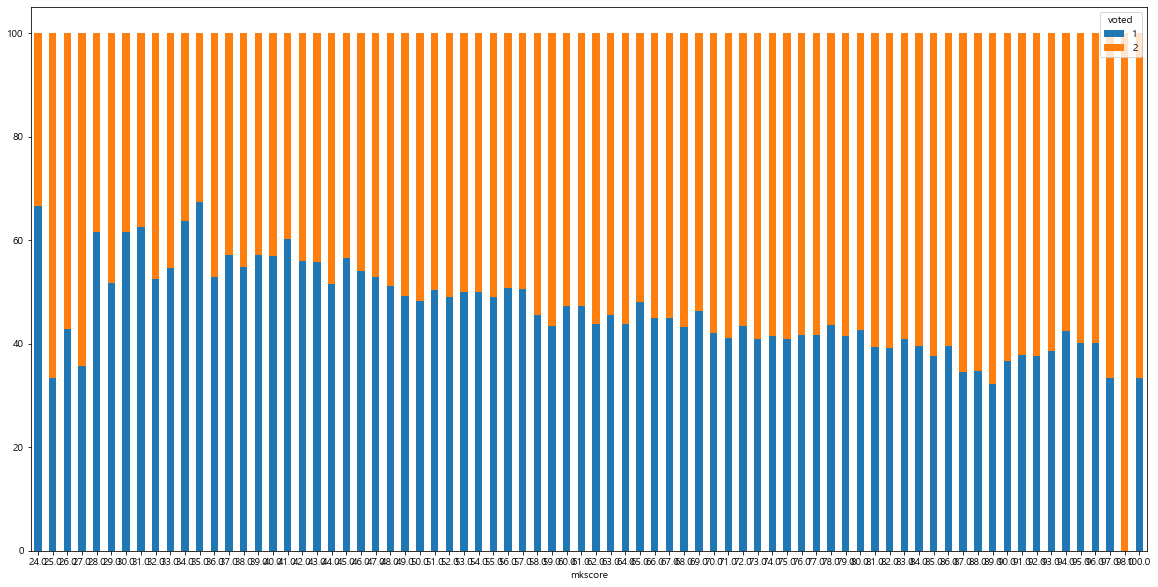

In [121]:
ax = train.groupby('mkscore')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(20, 10))
plt.show()

### tp 성격 점수

In [122]:
def make_tpscore(train):
    tp_df = train.filter(regex='tp\d\d')
    
    tp_df['openness'] = (tp_df['tp05'] + 8 - tp_df['tp10']) / 2
    tp_df['conscientiouness'] = (tp_df['tp03'] + 8 - tp_df['tp08']) / 2
    tp_df['extroversion'] = (tp_df['tp01'] + 8 - tp_df['tp06']) / 2
    tp_df['agreeableness'] = (tp_df['tp07'] + 8 - tp_df['tp02']) / 2
    tp_df['neuroticism'] = (tp_df['tp09'] + 8 - tp_df['tp04']) / 2
    
    for i in range(5):
        tp_personal = ['openness','conscientiouness','extroversion','agreeableness','neuroticism']
        tp_means = [5.51, 4.61, 3.98, 4.69, 4.34]

        def personal_diff(x):
            return abs(x - tp_means[i])

        tp_df[tp_personal[i] + 'diff'] = tp_df[tp_personal[i]].apply(personal_diff)
    
    
    tp_df['personality'] = tp_df[['opennessdiff', 'conscientiounessdiff', 'extroversiondiff', 'agreeablenessdiff', 'neuroticismdiff']].idxmin(axis=1)
    
    
    def change_personality(x):
        if x == 'opennessdiff':
            return 0
        elif x == 'conscientiounessdiff':
            return 1
        elif x == 'extroversiondiff':
            return 2
        elif x == 'agreeablenessdiff':
            return 3
        elif x == 'neuroticismdiff':
            return 4
    
    tp_df['personality'] = tp_df['personality'].apply(change_personality)
    
    train['character'] = tp_df['personality']
    return train

In [123]:
train = make_tpscore(train)
test = make_tpscore(test)


<ipython-input-122-164354eaa860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-122-164354eaa860>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-122-164354eaa860>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-122-164

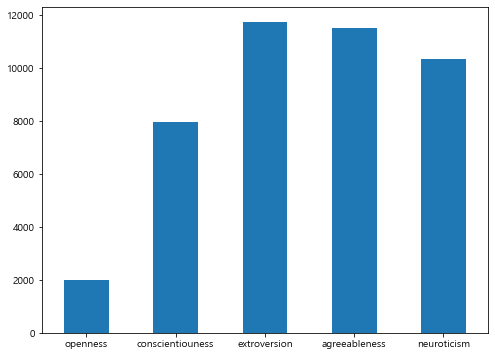

In [124]:
x_labels = ['openness','conscientiouness','extroversion','agreeableness','neuroticism']
ax = train['character'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

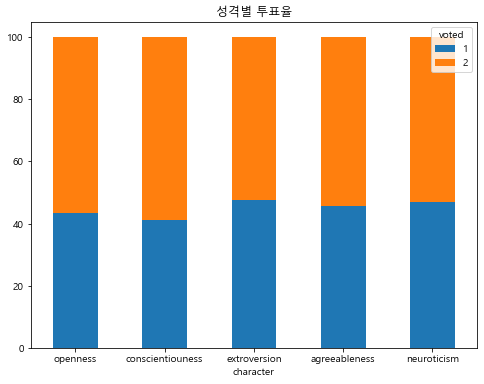

In [125]:
ax = train.groupby('character')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('성격별 투표율')
plt.show()

### 단어개수

In [126]:
def set_know_count(df):
    df['know_count'] = df.filter(regex = 'wr*').sum(axis = 1)
    return df

In [127]:
train = set_know_count(train)
test = set_know_count(test)

<AxesSubplot:>

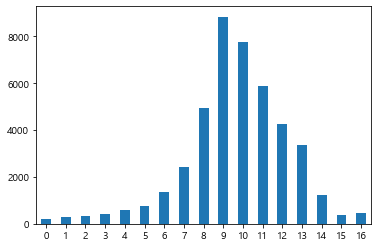

In [128]:
train['know_count'].value_counts().sort_index().plot(kind = 'bar', rot = 0)

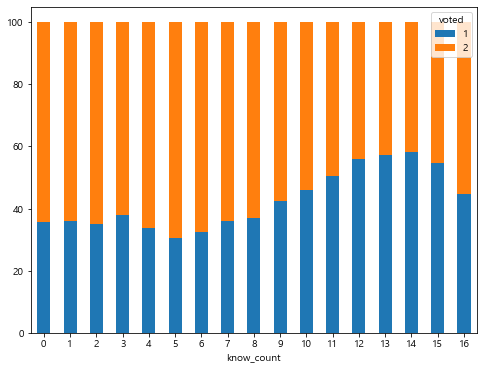

In [129]:
ax = train.groupby('know_count')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
plt.show()

### lgbm

In [130]:
display(train.head())
display(test.head())

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,label_age_group,label_gender,label_race,label_religion,mkscore,character,know_count
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,4.0,2.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0,4.0,0.0,4.0,3.0,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2,0,1,7,52.0,3,8
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,1.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,3.0,1.0,3.0,1.0,2.0,2.0,3.0,1.0,5.0,3.0,4.0,2.0,6.0,1.0,3.0,2.0,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,3,1,6,10,34.0,2,11
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,2.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,4.0,2.0,0.0,1.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,2,0,1,7,65.0,4,5
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,2.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,6.0,0.0,2.0,0.0,6.0,2.0,6.0,1.0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,2,1,6,0,58.0,2,12
6,5.0,1382,1.0,1473,5.0,1479,2.0,2403,5.0,616,2.0,549,1.0,390,4.0,1601,1.0,1312,1.0,1699,2.0,1229,4.0,1175,1.0,1078,2.0,341,5.0,635,2.0,1448,2.0,838,2.0,765,3.0,1954,1.0,1482,2.0,1.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,1.0,1.0,3.0,2.0,1.0,5.0,2.0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,2,1,6,1,51.0,1,12


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,label_age_group,label_gender,label_race,label_religion,mkscore,character,know_count
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,736,2.0,2941,3.0,4621,5.0,4857,4.0,2550,4.0,3171,1.0,3613,2.0,1494,2.0,1597,2.0,8891,1.0,2416,3.0,2043,3.0,3445,1.0,1232,3.0,1152,4.0,1447,3.0,798,2.0,1054,1.0,3462,2.0,1621,2,2,3,1,1,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,1,1,6,6,51.0,2,6
1,3.0,514,2.0,1952,3.0,1552,3.0,821,2.0,1150,1.0,605,4.0,601,1.0,2370,1.0,2268,3.0,1759,1.0,771,5.0,1124,3.0,4525,5.0,559,2.0,988,3.0,1014,2.0,380,1.0,995,3.0,629,4.0,708,2,2,2,2,1,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,3,52.0,2,0
2,3.0,500,2.0,2507,4.0,480,4.0,614,4.0,1326,2.0,767,5.0,799,1.0,1309,4.0,3317,4.0,766,2.0,1940,5.0,926,4.0,568,4.0,608,5.0,669,3.0,2417,3.0,710,2.0,2781,3.0,1110,5.0,1073,3,2,7,1,2,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,3,1,5,5,69.0,1,7
3,5.0,669,1.0,1050,5.0,1435,4.0,2252,1.0,2533,1.0,578,5.0,742,1.0,2886,5.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,5.0,412,2.0,1076,4.0,1445,1.0,1069,5.0,847,4.0,1126,1.0,1240,4,1,4,1,2,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,6,1,6,3,63.0,1,13
4,4.0,499,1.0,1243,5.0,845,4.0,1666,4.0,925,2.0,413,1.0,361,1.0,995,4.0,1427,3.0,1093,1.0,1201,4.0,1264,2.0,943,2.0,475,2.0,787,4.0,607,3.0,529,2.0,947,4.0,524,3.0,1945,2,1,3,1,1,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,6,0,56.0,1,10


In [131]:
wr_columns = [column for column in train.columns if column.startswith('w')]
train = train.drop(columns = wr_columns, axis=1)
test = test.drop(columns = wr_columns, axis=1)

In [132]:
Q_columns = [column for column in train.columns if column.startswith('Q')]
train = train.drop(columns = Q_columns, axis=1)
test = test.drop(columns = Q_columns, axis=1)

In [133]:
tp_columns = [column for column in train.columns if column.startswith('tp')]
train = train.drop(columns = tp_columns, axis=1)
test = test.drop(columns = tp_columns, axis=1)

In [134]:
train_y = train['voted']

In [135]:
train1 = train.drop(columns=['voted'], axis=1)

In [136]:
display(train1.head())
display(test.head())

,education,engnat,familysize,hand,married,urban,label_age_group,label_gender,label_race,label_religion,mkscore,character,know_count
index,,,,,,,,,,,,,
1,4.0,2.0,3.0,1.0,1.0,3.0,2,0,1,7,52.0,3,8
2,3.0,1.0,3.0,1.0,2.0,2.0,3,1,6,10,34.0,2,11
3,4.0,2.0,0.0,1.0,1.0,3.0,2,0,1,7,65.0,4,5
4,3.0,1.0,2.0,1.0,2.0,1.0,2,1,6,0,58.0,2,12
6,2.0,1.0,3.0,1.0,1.0,2.0,2,1,6,1,51.0,1,12


,education,engnat,familysize,hand,married,urban,label_age_group,label_gender,label_race,label_religion,mkscore,character,know_count
index,,,,,,,,,,,,,
0,2,2,3,1,1,2,1,1,6,6,51.0,2,6
1,2,2,2,2,1,3,1,1,5,3,52.0,2,0
2,3,2,7,1,2,1,3,1,5,5,69.0,1,7
3,4,1,4,1,2,2,6,1,6,3,63.0,1,13
4,2,1,3,1,1,2,1,1,6,0,56.0,1,10


In [137]:
model = LGBMClassifier()
model.fit(train1, train_y)
prediction = model.predict(test)

In [138]:
prediction

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

In [139]:
submission['voted'] = prediction
submission.to_csv('submission.csv')

In [140]:
submission

,voted
index,
0,2
1,2
2,1
3,1
4,2
...,...
11378,1
11379,2
11380,1


In [141]:
train.to_csv("train_x.csv", index=False)
test.to_csv("test_c.csv", index=False)